# **Monte Carlo Integration**

## **Introduction**

The **Monte Carlo method**, named after the Monte Carlo Casino in Monaco, is a simple procedure used to compute the integral of a function. Despite having a longer convergence time, the Monte Carlo method is widely used as it is inherently simple, allowing for their use in problems where it is difficult or impossible to use other approaches. It is also easily generalisable to solve problems in higher dimensions, as the number of samples needed do not scale like $N^d$, where $d$ is the dimensionality of the problem, as is the case with conventional methods like the trapezoid rule. 

The procedure is as follows. Say we have an arbitrary function $f(x)$ that we want to integrate over a given boundary

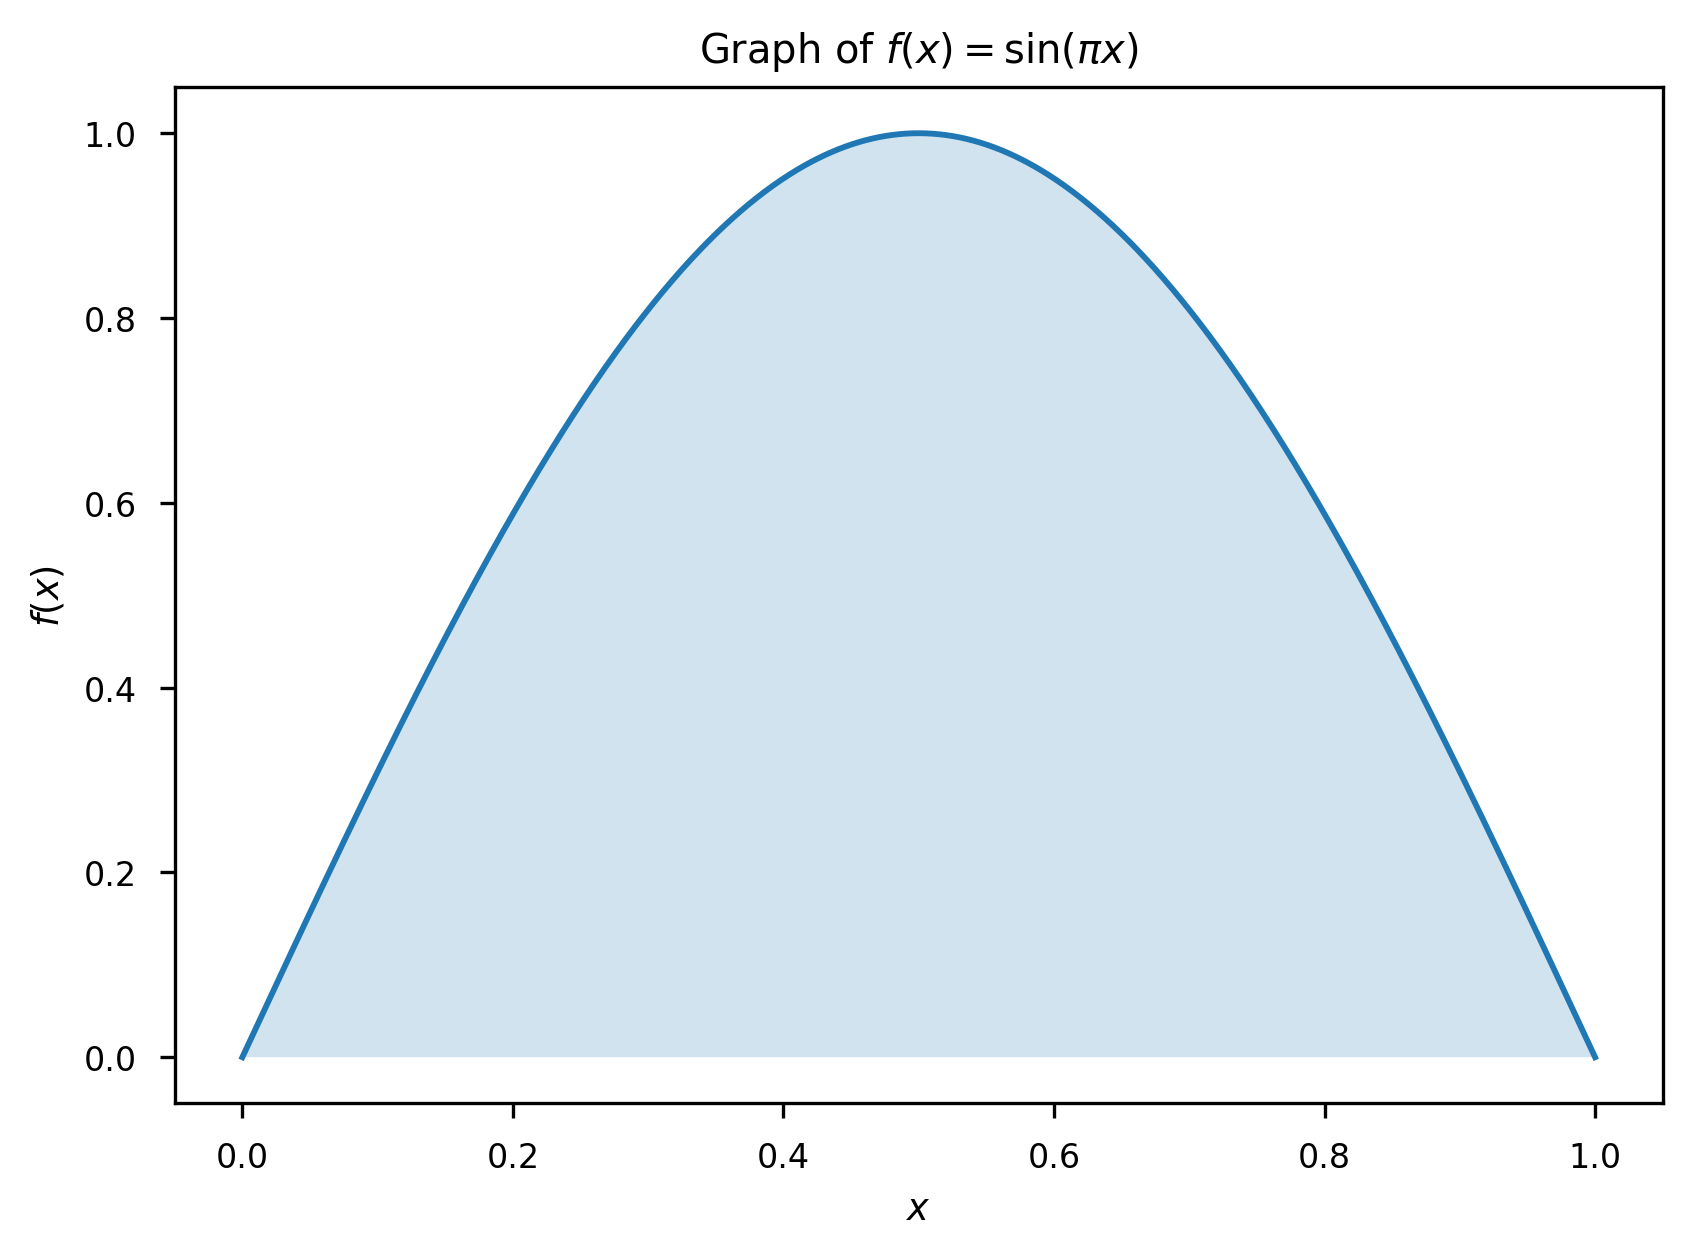

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.sin(np.pi*x)

N = 1000
x = np.linspace(0, 1, N)

plt.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-v0_8-paper')
plt.plot(x, f(x))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Graph of $f(x) = \sin(\pi x)$')
plt.fill_between(x, f(x), alpha=0.2)

In this case, we are integrating between the points $x = 0$ and $x = 1$. We then evaluate the function at random points generated by a uniform distribution. For each point, we'll take the function value and multiply it by the length of the region we are integrating over. This gives the area of a rectangle whose height is our function value. 

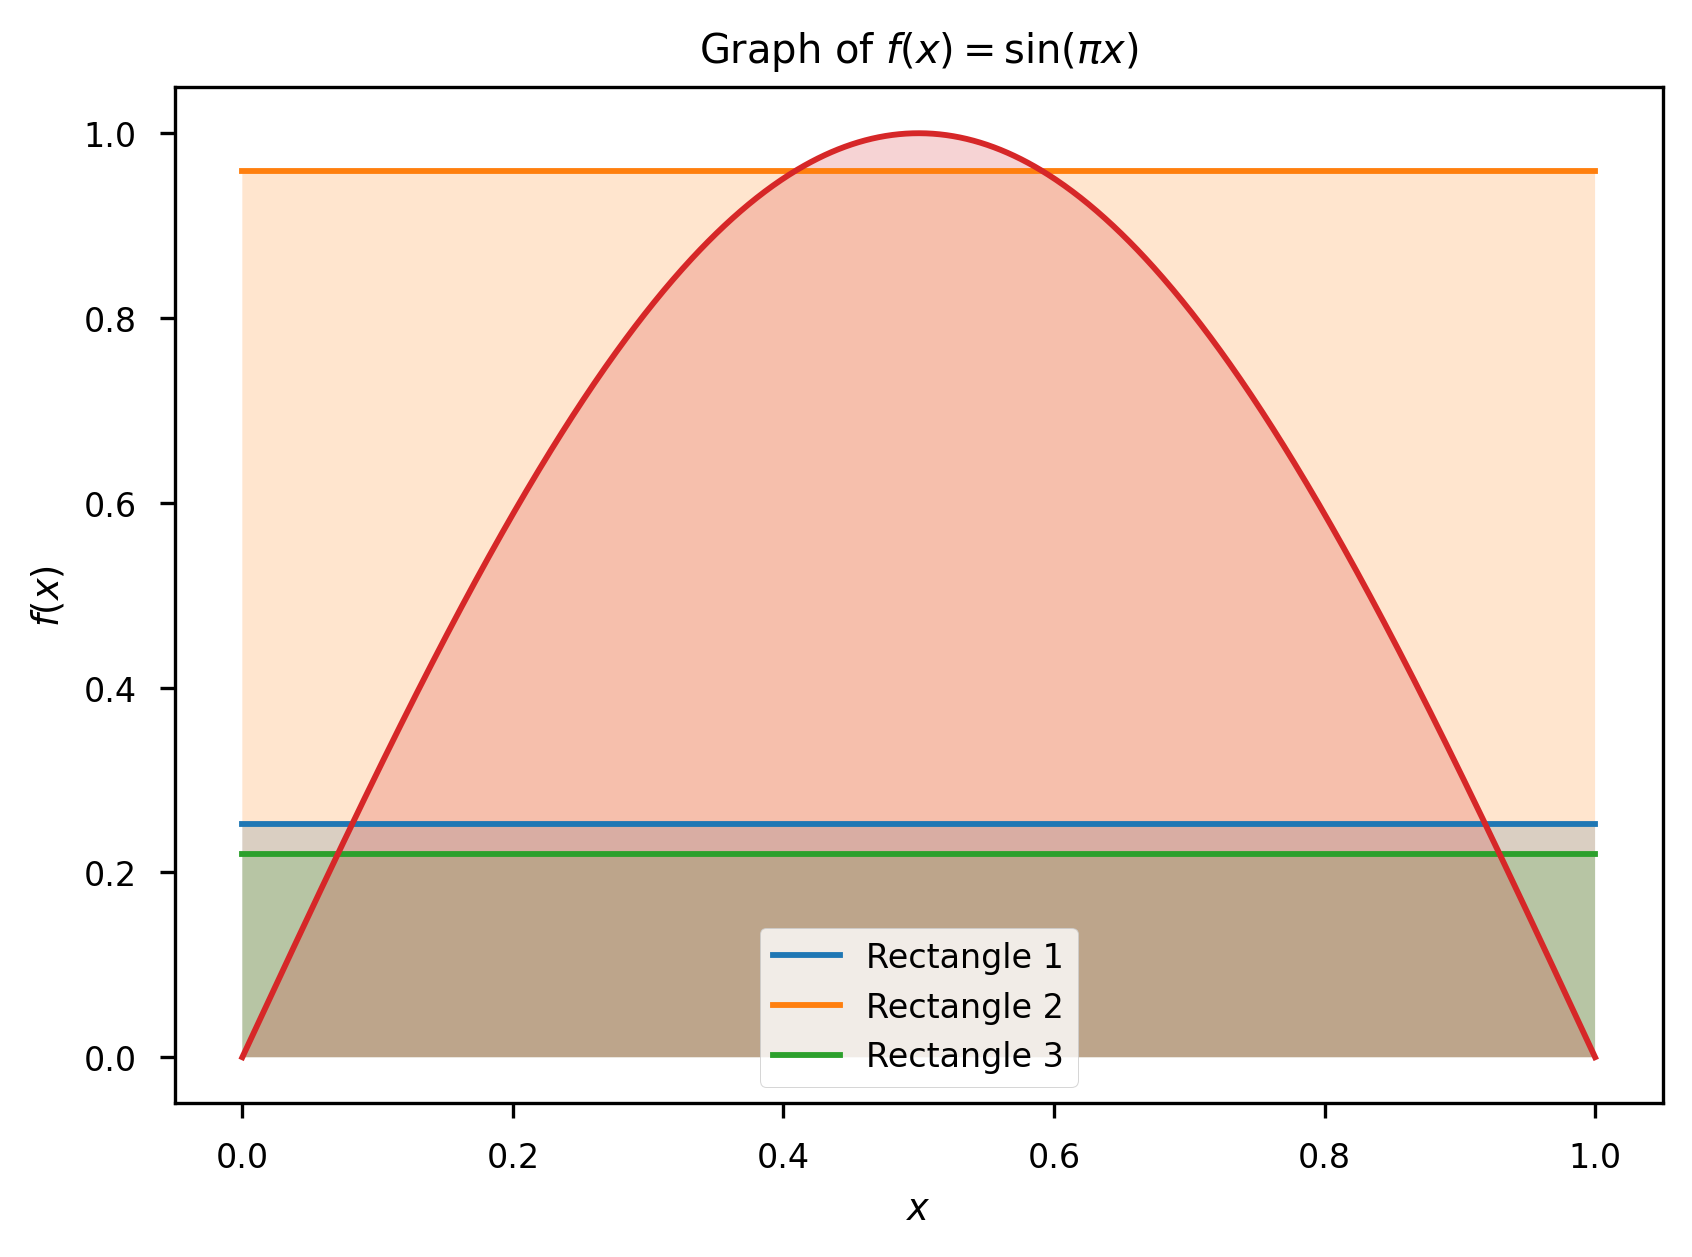

In [3]:
def rectangle(x):
    return f(x)*np.ones(N)


for i in range(3):
    y = np.random.uniform(0, 1)  
    plt.plot(x, rectangle(y), label=f'Rectangle {i+1}')
    plt.fill_between(x, rectangle(y), alpha=0.2)
    

plt.plot(x, f(x))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Graph of $f(x) = \sin(\pi x)$')
plt.fill_between(x, f(x), alpha=0.2)
plt.legend()

The Monte Carlo method then says that the average or *expectation value* of the areas of these rectangles will coverge to the integral of interest as the number of samples increases. 

Analytically, we know that the area under the curve is just

$$\begin{aligned}\int_0^1 \sin(\pi x)  \ dx &= - \frac{1}{\pi}\left[\cos(\pi) - \cos(0)\right] \\ \\

&= \frac{2}{\pi} \\ \\

& \approx 0.63662
\end{aligned}
$$

So let's see if we really get the correct answer from the Monte Carlo method.

In [4]:
N = 1000000

z = np.random.uniform(0, 1, N)
monte_carlo = np.mean(f(z) * 1)

print(monte_carlo)

0.6366683220328605


And we see that it does converge to the correct value for the integral! However, even with 1000000 iterations, our solution is only accurate up to three significant figures. As we have previously mentioned, this is one of the drawbacks of the Monte Carlo method.

We can formalise the Monte Carlo method with the following formula

$$\langle F^N \rangle = (b-a)\frac{1}{N}\sum_{i = 1}^N f(x_i)$$

This is the **basic Monte Carlo estimator**. Note that $\langle F^N \rangle$ is a random variable — its value changes every time we run the code above. Taking the expectation value of both sides of the equation

$$ \begin{aligned}E\left[\langle F^N \rangle \right] &= E\left[(b-a)\frac{1}{N}\sum_{i = 1}^N f(x_i)\right] \\ \\ 

& = (b-a)\frac{1}{N}\sum_{i = 1}^N E\left[f(x_i)\right] \\ \\ 

& = (b-a)\frac{1}{N}\sum_{i = 1}^N \int_a^b \frac{f(x)}{b-a}  \ dx  \\ \\ 

& = \frac{1}{N}\sum_{i = 1}^N \int_a^b f(x) \  dx \\ \\ 

& = \int_a^b f(x) \  dx \\ \\

& = F

\end{aligned}$$

We see that the expectation value of the estimator is the integral we are looking for. 

### **Problems**

Evaluate the following integrals using the Monte Carlo method and compare the obtained values to those from Simpson's rule, the trapezoid rule, and the analytical solution. 

(a) $I = \int_0^1 e^{-x}\cos x \ dx$
   
(b) $I = \int_0^{2\pi} e^{\sin 2x} \ dx$

(c) $I = \int_0^{2\pi} \frac{1}{2 + \cos x} \ dx$

In [27]:
from scipy.integrate import simpson, trapezoid

# Integrands
def f1(x):
    return np.exp(-x) * np.cos(x)

def f2(x):
    return np.exp(np.sin(2*x))

def f3(x):
    return 1/(2 + np.cos(x))


N = 1000000  # Number of points

# Generate N number of uniformly distributed points
z1 = np.random.uniform(0, 1, N)  
z2 = np.random.uniform(0, 2*np.pi, N)

# Monte Carlo Method
monte_carlo_1 = np.mean(f1(z1) * (1 - 0))
monte_carlo_2 = np.mean(f2(z2) * (2*np.pi - 0))
monte_carlo_3 = np.mean(f3(z2) * (2*np.pi - 0))

# Points for Simpson's and trapezoid rule
x1 = np.linspace(0, 1, 1000)
x2 = np.linspace(0, 2*np.pi, 1000)

# Simpson's Rule
simpson_1 = simpson(f1(x1), x=x1)
simpson_2 = simpson(f2(x2), x=x2)
simpson_3 = simpson(f3(x2), x=x2)

# Trapezoid Rule
trapezoid_1 = trapezoid(f1(x1), x=x1)
trapezoid_2 = trapezoid(f2(x2), x=x2)
trapezoid_3 = trapezoid(f3(x2), x=x2)


print(f'Monte Carlo method: {monte_carlo_1, monte_carlo_2, monte_carlo_3}')
print(f"Simpson's rule: {simpson_1, simpson_2, simpson_3} ")
print(f"Trapezoid rule: {trapezoid_1, trapezoid_2, trapezoid_3} ")
print(f"Analytical solution: (0.5553968826533496, 7.954926521012847, 3.627598728468436)")

Monte Carlo method: (0.55513100782066, 7.95259188065178, 3.627017126103762)
Simpson's rule: (0.5553968826792579, 7.954926603941517, 3.6275987307721085) 
Trapezoid rule: (0.555396923708256, 7.954926521012846, 3.6275987284684357) 
Analytical solution: (0.5553968826533496, 7.954926521012847, 3.627598728468436)


As can be seen from the solutions above, the Monte Carlo method with 1000000 iterations consistently yields a solution that is only accurate up to three significant figures. The benefits, however, lie in its simplicity and wide applicability. 

## **The Generalised Monte Carlo Estimator**

For some integrals, it may be more useful to use something other than a uniform distribution. The **generalised Monte Carlo estimator** is as follows

$$\langle F^N \rangle = \frac{1}{N}\sum_{i = 1}^N \frac{f(x_i)}{\text{pdf}(x_i)}$$

Again, we'll prove that its expectation value is equal to the integral of interest.

$$ \begin{aligned}E\left[\langle F^N \rangle \right] &= E\left[\frac{1}{N}\sum_{i = 1}^N \frac{f(x_i)}{\text{pdf}(x_i)}\right] \\ \\ 

& = \frac{1}{N}\sum_{i = 1}^N E\left[\frac{f(x_i)}{\text{pdf}(x_i)}\right] \\ \\ 

& = \frac{1}{N}\sum_{i = 1}^N \int_a^b \frac{f(x)}{\text{pdf}(x)}\text{pdf}(x)  \ dx  \\ \\ 

& = \frac{1}{N}\sum_{i = 1}^N \int_a^b f(x) \  dx \\ \\ 

& = \int_a^b f(x) \  dx \\ \\

& = F 

\end{aligned}$$

### **Problems**

Apply the normal distribution using the Monte Carlo method to solve the following integral

$$I = \int_{10^{-6}}^{1}\frac{e^{-x}}{x} \ dx$$

We'll use the `truncnorm` function from `scipy` to get our normally distributed points and the probability density function (pdf).

In [28]:
from scipy.stats import truncnorm


def f4(x): # Integrand
    return np.exp(-x)/x 


# Parameters of truncated normal distribution
N = 10000000  # Number of points
mu = 0  # Mean 
sigma = 0.333  # Standard deviation 
a_trunc, b_trunc = 1e-6, 1  # Integral boundaries
a, b = (a_trunc - mu) / sigma, (b_trunc - mu) / sigma  # Truncatiom boundaries

# Monte Carlo using truncated normal distribution
g = truncnorm.rvs(a, b, loc=mu, scale=sigma, size=N)  # Generate N number of normally distributed points
pdf = truncnorm.pdf(g, a, b, loc=mu, scale=sigma)  # Compute value of pdf at points
monte_carlo_4 = np.mean(f4(g)/pdf)

# Monte Carlo using uniform distribution
z3 = np.random.uniform(b_trunc, a_trunc, N)
monte_carlo_5 = np.mean(f4(z3) * (b_trunc - a_trunc))


print(f'Normal distribution: {monte_carlo_4}')
print(f'Uniform distribution: {monte_carlo_5}')
print(f'Analytical solution: 13.01891195866697')

Normal distribution: 12.896513164329198
Uniform distribution: 12.844939596156301
Analytical solution: 13.01891195866697
